# MELBORNE HOUSING PRICE


#### Some Key Details:
Suburb: Suburb

Address: Address

Rooms: Number of rooms

Price: Price in Australian dollars

#### Method:
S: property sold
SP: property sold prior
PI: property passed in
PN : sold prior not disclosed
SN : sold not disclosed
NB : no bid
VB : vendor bid
W : withdrawn prior to auction
SA : sold after auction
SS : sold after auction price not disclosed
N/A : price or highest bid not available

#### Type:
br : bedroom(s)
h : house,cottage,villa, semi,terrace
u : unit, duplex
t : townhouse
dev site : development site
o res : other residential

#### Other

SellerG: Real Estate Agent

Date: Date sold

Distance: Distance from CBD in Kilometres

Regionname: General Region (West, North West, North, North east …etc)

Propertycount: Number of properties that exist in the suburb.

Bedroom2 : Scraped # of Bedrooms (from different source)

Bathroom: Number of Bathrooms

Car: Number of carspots

Landsize: Land Size in Metres

BuildingArea: Building Size in Metres

YearBuilt: Year the house was built

CouncilArea: Governing council for the area

Lattitude: Self explanitory

Longtitude: Self explanitory

In [264]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import scipy.stats as stats
import tensorflow as tf
from scipy.stats import f_oneway
from sklearn.preprocessing import PowerTransformer
from IPython.display import Image

In [265]:
df_csv = pd.read_csv("C:/Users/Admin/Desktop/1CBDRobotic/res/week4/archive/Melbourne_housing_FULL.csv")
df_csv['Date'] = pd.to_datetime(df_csv['Date']).apply(lambda x: x.date())

### CHECK INSIGHT

In [266]:
print(df_csv.shape)
print(df_csv.describe())

(34857, 21)
              Rooms         Price      Distance      Postcode      Bedroom2  \
count  34857.000000  2.724700e+04  34856.000000  34856.000000  26640.000000   
mean       3.031012  1.050173e+06     11.184929   3116.062859      3.084647   
std        0.969933  6.414671e+05      6.788892    109.023903      0.980690   
min        1.000000  8.500000e+04      0.000000   3000.000000      0.000000   
25%        2.000000  6.350000e+05      6.400000   3051.000000      2.000000   
50%        3.000000  8.700000e+05     10.300000   3103.000000      3.000000   
75%        4.000000  1.295000e+06     14.000000   3156.000000      4.000000   
max       16.000000  1.120000e+07     48.100000   3978.000000     30.000000   

           Bathroom           Car       Landsize  BuildingArea     YearBuilt  \
count  26631.000000  26129.000000   23047.000000   13742.00000  15551.000000   
mean       1.624798      1.728845     593.598993     160.25640   1965.289885   
std        0.724212      1.010771   

## NOTE:
#### We can see that in some features, min = 0, also max values is too big, these can be a sign to detect ouliners.

In [267]:
print(df_csv.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

#### Some features included null values, also Dtype still not ideal for building a ML model.

#### Check Propertycount base on Suburb

In [268]:
df_temp1 = df_csv[['Suburb','Propertycount']]
df_temp1.head(3)

,Suburb,Propertycount
0,Abbotsford,4019.0
1,Abbotsford,4019.0
2,Abbotsford,4019.0


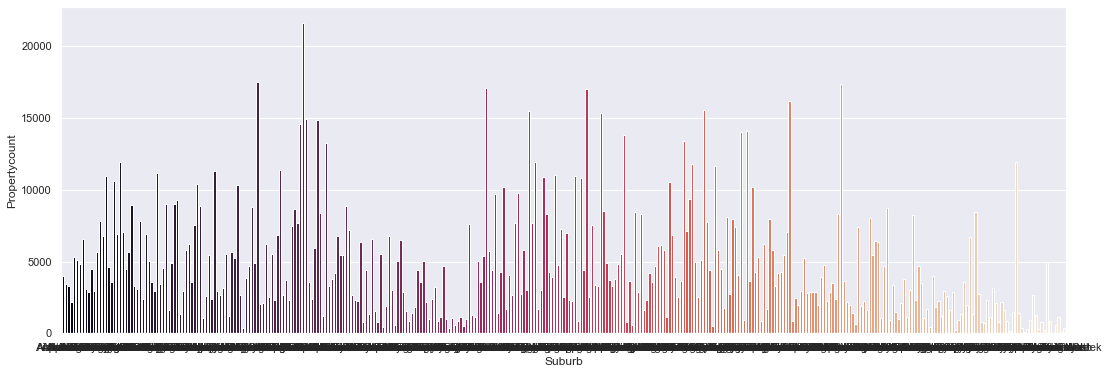

In [269]:
plt.figure(figsize=(18,6))
temp1 = sns.barplot(x='Suburb',y='Propertycount',data=df_temp1,palette="rocket")
plt.show()

#### Comment: Amounts of PropertyCount is ok, we can use for further purposes.

#### In my hypothesis, we can combine these 4 features because its all indicate positions, thus we can just pick the feature that have most amounts.

In [270]:
print(len(df_csv.Regionname.unique()))
print(len(df_csv.Propertycount.unique()))
print(len(df_csv.Postcode.unique()))
print(len(df_csv.Suburb.unique()))

9
343
212
351


#### Suburb is the feature has most amount
#### We will get some insight of this feature

In [271]:
# # index all suburbs
# Suburb_dict = dict(zip(df_csv.Suburb.unique(), range(len(df_csv.Suburb.unique()))))
# print(Suburb_dict)

In [272]:
df_temp2 = df_csv.Suburb.value_counts()
print(type(df_temp2))

<class 'pandas.core.series.Series'>


In [273]:
print(df_temp2)

Reservoir          844
Bentleigh East     583
Richmond           552
Glen Iris          491
Preston            485
                  ... 
Belgrave             1
Guys Hill            1
Wildwood             1
Hopetoun Park        1
Cranbourne East      1
Name: Suburb, Length: 351, dtype: int64


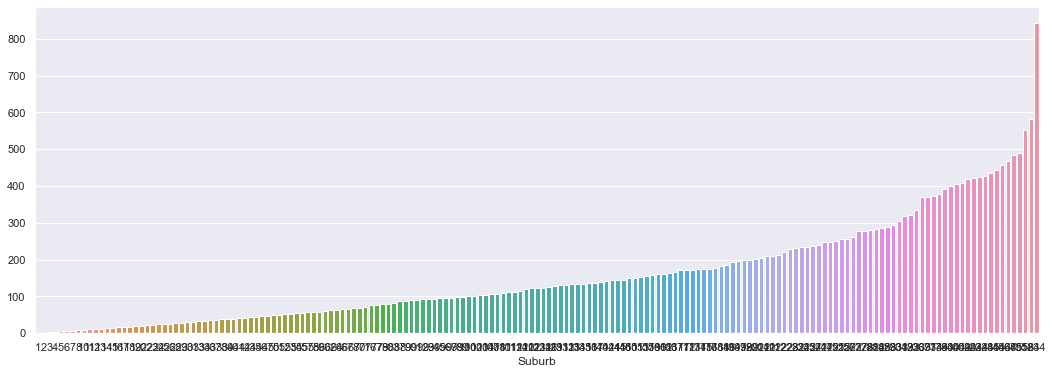

In [274]:
plt.figure(figsize=(18,6))
temp2 = sns.barplot(x=df_temp2.index,y=df_temp2.values,data=df_temp2)

In [275]:
df_temp2.describe()

count    351.000000
mean      99.307692
std      120.491503
min        1.000000
25%       16.000000
50%       55.000000
75%      135.500000
max      844.000000
Name: Suburb, dtype: float64

#### Some suburbs only have a few samples, we will remove half of them, which mean we just keep suburbs having more than 55 samples

In [276]:
df_temp3 = pd.DataFrame(df_temp2)
df = df_temp3[df_temp3.Suburb >=60]
df

,Suburb
Reservoir,844
Bentleigh East,583
Richmond,552
Glen Iris,491
Preston,485
...,...
Taylors Lakes,62
Mooroolbark,62
Mordialloc,62
Blackburn South,62


In [277]:
print(df.index)

Index(['Reservoir', 'Bentleigh East', 'Richmond', 'Glen Iris', 'Preston',
       'Kew', 'Brighton', 'Brunswick', 'South Yarra', 'Hawthorn',
       ...
       'West Melbourne', 'Melton South', 'Balaclava', 'Wollert', 'Montmorency',
       'Taylors Lakes', 'Mooroolbark', 'Mordialloc', 'Blackburn South',
       'Burwood East'],
      dtype='object', length=163)


#### We have a new dataframe:

In [278]:
df_af1 = df_csv.head(1)

In [279]:
for i in df.index:
    df_af1 = df_af1.append(df_csv[df_csv.Suburb == i], ignore_index=True)

In [280]:
print(df_af1.shape)
df_af1.head(5)

(30624, 21)


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,2016-03-09,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Reservoir,36a Ashton St,3,u,666000.0,S,Barry,2016-03-09,11.2,3073.0,...,NaN,NaN,NaN,NaN,NaN,Darebin City Council,NaN,NaN,Northern Metropolitan,21650.0
2,Reservoir,3/39 Chaleyer St,2,u,NaN,S,Barry,2016-03-09,11.2,3073.0,...,1.0,1.0,147.0,NaN,1998.0,Darebin City Council,-37.7281,145.0231,Northern Metropolitan,21650.0
3,Reservoir,1/21 Dumbarton St,3,u,475000.0,S,Ray,2016-03-09,11.2,3073.0,...,1.0,1.0,191.0,107.0,1990.0,Darebin City Council,-37.7019,145.0256,Northern Metropolitan,21650.0
4,Reservoir,39 Gertz Av,5,h,NaN,W,Barry,2016-03-09,11.2,3073.0,...,NaN,NaN,NaN,NaN,NaN,Darebin City Council,NaN,NaN,Northern Metropolitan,21650.0


#### After removed some suburbs, we will continue with some features that have a high correlation


#### Correlation 4 feature 'Rooms', 'Bathroom', 'Bedroom2', 'Car' :

In [281]:
df_temp3 = df_af1[['Rooms','Bathroom','Bedroom2','Car']]


In [282]:
df_temp3.head(3)

,Rooms,Bathroom,Bedroom2,Car
0,2,1.0,2.0,1.0
1,3,NaN,NaN,NaN
2,2,1.0,2.0,1.0


In [283]:
corr = df_temp3.corr()
print(corr)

             Rooms  Bathroom  Bedroom2       Car
Rooms     1.000000  0.610462  0.949574  0.396181
Bathroom  0.610462  1.000000  0.616389  0.305820
Bedroom2  0.949574  0.616389  1.000000  0.389704
Car       0.396181  0.305820  0.389704  1.000000


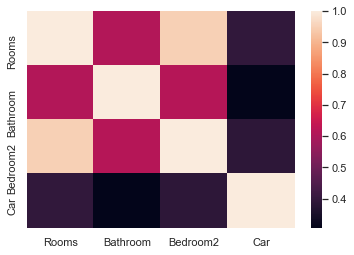

In [284]:
sns.set_theme()
ax = sns.heatmap(corr)

#### the correlation between Rooms and Bedroom2 is high (0,95), so that we can remove one of them. We can see above that Rooms didn't have any Null value, whereas Bedroom2 had more than 10000, so we will remove Bedroom2.


#### Check corellation between landsize and building Area

In [285]:
df_temp4 = df_af1[['Landsize','BuildingArea']]

In [286]:
corr2 = df_temp4.corr()
print(corr2)

              Landsize  BuildingArea
Landsize      1.000000      0.077385
BuildingArea  0.077385      1.000000


#### Clearly that these features don't have any relation.
#### => explant: because the price higher when Building Area higher, but Landsize bigger doesn't mean that Building Area is bigger, because the precent of floor area we are allowed to build is in respect of building code, so its limit the floor area we can build.

# BRIEFLY SUMMARY:
##### 5 feature : region name, suburb, property count, council area, postcode will be combined into just 1 feature, is Suburb
##### Remove feature Bedroom2,  region name, property count, council, postcode, Lattitude, Longtitude ( we will remove Lattitude and Longtitude because its too specific and can be a future problem about overfitting)
##### Remove Seller, although seller can potentially affect to price, but this is a temporary feature (Seller can be difference by time).

### We have new dataframe:


In [287]:
df_af2 = df_af1[['Suburb','Address','Rooms','Type','Price','Method','Date','Distance','Bathroom','Car','Landsize','BuildingArea','YearBuilt']]

In [288]:
df_af2.head(5)

,Suburb,Address,Rooms,Type,Price,Method,Date,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt
0,Abbotsford,68 Studley St,2,h,NaN,SS,2016-03-09,2.5,1.0,1.0,126.0,NaN,NaN
1,Reservoir,36a Ashton St,3,u,666000.0,S,2016-03-09,11.2,NaN,NaN,NaN,NaN,NaN
2,Reservoir,3/39 Chaleyer St,2,u,NaN,S,2016-03-09,11.2,1.0,1.0,147.0,NaN,1998.0
3,Reservoir,1/21 Dumbarton St,3,u,475000.0,S,2016-03-09,11.2,1.0,1.0,191.0,107.0,1990.0
4,Reservoir,39 Gertz Av,5,h,NaN,W,2016-03-09,11.2,NaN,NaN,NaN,NaN,NaN


In [289]:
df_af2.describe()

,Rooms,Price,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt
count,30624.00000,2.390600e+04,30624.000000,23319.000000,22855.000000,20370.000000,11987.000000,13648.000000
mean,2.99631,1.079449e+06,10.173664,1.611947,1.693765,543.136132,155.187417,1963.271395
std,0.97184,6.598827e+05,5.633624,0.729217,0.993936,3195.230774,134.403348,38.239260
min,1.00000,8.500000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000
25%,2.00000,6.480000e+05,6.200000,1.000000,1.000000,208.000000,100.000000,1938.000000
50%,3.00000,9.000000e+05,9.400000,1.000000,2.000000,482.000000,134.000000,1970.000000
75%,4.00000,1.326000e+06,13.100000,2.000000,2.000000,661.000000,185.000000,2000.000000
max,16.00000,1.120000e+07,38.000000,12.000000,26.000000,433014.000000,6791.000000,2106.000000


## Outliners and NaN values
#### We have 2 main problems:
#####  1. Features: Rooms, Distance, Bathroom, Car, Landsize, BuildingArea và YearBuilt can have ouliners
#####  2. Need to deal with 0 values in features: Distance, Landsize, BuildingArea 

In [290]:
for i in ['Distance','Landsize','BuildingArea']:
    df_af2 = df_af2[df_af2[i] != 0]

In [291]:
df_af2.describe()


,Rooms,Price,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt
count,28156.000000,2.194000e+04,28156.000000,20918.000000,20458.000000,17988.000000,10642.000000,12036.000000
mean,3.081581,1.116735e+06,10.516249,1.651831,1.757454,613.492050,164.617681,1961.295115
std,0.941507,6.656174e+05,5.642470,0.739455,1.012376,3393.642997,137.753801,38.945950
min,1.000000,1.120000e+05,0.700000,0.000000,0.000000,1.000000,0.010000,1196.000000
25%,2.000000,6.780000e+05,6.400000,1.000000,1.000000,291.000000,109.000000,1930.000000
50%,3.000000,9.320000e+05,10.100000,2.000000,2.000000,544.000000,141.000000,1965.000000
75%,4.000000,1.361500e+06,13.700000,2.000000,2.000000,682.000000,195.000000,1998.000000
max,16.000000,1.120000e+07,38.000000,12.000000,26.000000,433014.000000,6791.000000,2106.000000


In [292]:
df_af2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28156 entries, 0 to 30623
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Suburb        28156 non-null  object 
 1   Address       28156 non-null  object 
 2   Rooms         28156 non-null  int64  
 3   Type          28156 non-null  object 
 4   Price         21940 non-null  float64
 5   Method        28156 non-null  object 
 6   Date          28156 non-null  object 
 7   Distance      28156 non-null  float64
 8   Bathroom      20918 non-null  float64
 9   Car           20458 non-null  float64
 10  Landsize      17988 non-null  float64
 11  BuildingArea  10642 non-null  float64
 12  YearBuilt     12036 non-null  float64
dtypes: float64(7), int64(1), object(5)
memory usage: 3.0+ MB


## Replace NaN values by quantile 0.5
#### Because NaN values are quite much, remove them may not be a good choice, we could replace these with a quantile 0.5 instead


In [293]:
df_af2.head(5)

,Suburb,Address,Rooms,Type,Price,Method,Date,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt
0,Abbotsford,68 Studley St,2,h,NaN,SS,2016-03-09,2.5,1.0,1.0,126.0,NaN,NaN
1,Reservoir,36a Ashton St,3,u,666000.0,S,2016-03-09,11.2,NaN,NaN,NaN,NaN,NaN
2,Reservoir,3/39 Chaleyer St,2,u,NaN,S,2016-03-09,11.2,1.0,1.0,147.0,NaN,1998.0
3,Reservoir,1/21 Dumbarton St,3,u,475000.0,S,2016-03-09,11.2,1.0,1.0,191.0,107.0,1990.0
4,Reservoir,39 Gertz Av,5,h,NaN,W,2016-03-09,11.2,NaN,NaN,NaN,NaN,NaN


In [294]:
df_af3 = df_af2.copy()

In [295]:
df_af3.head(5)

,Suburb,Address,Rooms,Type,Price,Method,Date,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt
0,Abbotsford,68 Studley St,2,h,NaN,SS,2016-03-09,2.5,1.0,1.0,126.0,NaN,NaN
1,Reservoir,36a Ashton St,3,u,666000.0,S,2016-03-09,11.2,NaN,NaN,NaN,NaN,NaN
2,Reservoir,3/39 Chaleyer St,2,u,NaN,S,2016-03-09,11.2,1.0,1.0,147.0,NaN,1998.0
3,Reservoir,1/21 Dumbarton St,3,u,475000.0,S,2016-03-09,11.2,1.0,1.0,191.0,107.0,1990.0
4,Reservoir,39 Gertz Av,5,h,NaN,W,2016-03-09,11.2,NaN,NaN,NaN,NaN,NaN


In [296]:
for i in ['Price', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt']:
    df_af3[i].replace([np.nan], df_af2[i].quantile(0.5) , inplace=True)

In [297]:
df_af3.head(5)

,Suburb,Address,Rooms,Type,Price,Method,Date,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt
0,Abbotsford,68 Studley St,2,h,932000.0,SS,2016-03-09,2.5,1.0,1.0,126.0,141.0,1965.0
1,Reservoir,36a Ashton St,3,u,666000.0,S,2016-03-09,11.2,2.0,2.0,544.0,141.0,1965.0
2,Reservoir,3/39 Chaleyer St,2,u,932000.0,S,2016-03-09,11.2,1.0,1.0,147.0,141.0,1998.0
3,Reservoir,1/21 Dumbarton St,3,u,475000.0,S,2016-03-09,11.2,1.0,1.0,191.0,107.0,1990.0
4,Reservoir,39 Gertz Av,5,h,932000.0,W,2016-03-09,11.2,2.0,2.0,544.0,141.0,1965.0


In [298]:
df_af3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28156 entries, 0 to 30623
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Suburb        28156 non-null  object 
 1   Address       28156 non-null  object 
 2   Rooms         28156 non-null  int64  
 3   Type          28156 non-null  object 
 4   Price         28156 non-null  float64
 5   Method        28156 non-null  object 
 6   Date          28156 non-null  object 
 7   Distance      28156 non-null  float64
 8   Bathroom      28156 non-null  float64
 9   Car           28156 non-null  float64
 10  Landsize      28156 non-null  float64
 11  BuildingArea  28156 non-null  float64
 12  YearBuilt     28156 non-null  float64
dtypes: float64(7), int64(1), object(5)
memory usage: 3.0+ MB


## Finding Outliner:

In [299]:
def Zscore_outlier(df):
    out = []
    mean = np.mean(df)
    std = np.std(df)
    for i in df: 
        z = (i - mean) / std
        if np.abs(z) > 3: 
            out.append(i)
    return out
    #print("Outliers:",out)

##### Car

In [300]:
outliner_car = Zscore_outlier(df_af3['Car'])

5.0


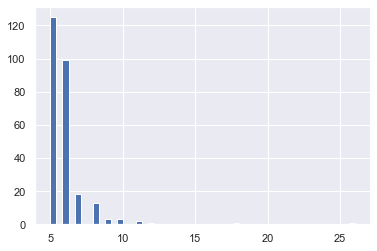

In [301]:
#print(outliner_car)
print(min(outliner_car))
plt.hist(outliner_car,50)
plt.show()

#### Rooms

In [302]:
outliner_rooms = Zscore_outlier(df_af3['Rooms'])

6


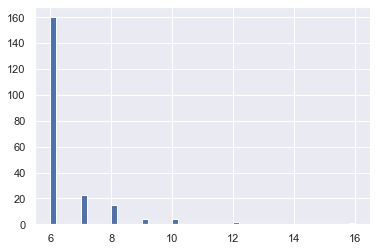

In [303]:
#print(outliner_rooms)
print(min(outliner_rooms))
plt.hist(outliner_rooms,50)
plt.show()

#### Price

In [304]:
outliner_price = Zscore_outlier(df_af3['Price'])

2855000.0


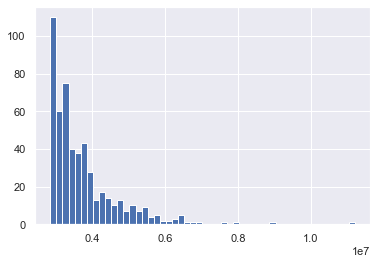

In [305]:
# print(outliner_price)
print(min(outliner_price))
plt.hist(outliner_price,50)
plt.show()

#### Distance

In [306]:
outliner_distance = Zscore_outlier(df_af3['Distance'])

29.8


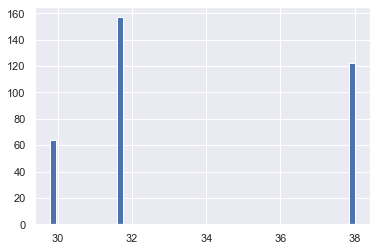

In [307]:
#print(outliner_distance)
print(min(outliner_distance))
plt.hist(outliner_distance,50)
plt.show()

#### Bathroom

In [308]:
outliner_Bathroom = Zscore_outlier(df_af3['Bathroom'])

4.0


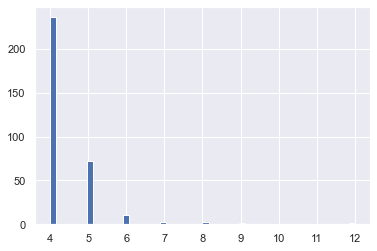

In [309]:
#print(outliner_distance)
print(min(outliner_Bathroom))
plt.hist(outliner_Bathroom,50)
plt.show()

#### Landsize

In [310]:
outliner_Landsize = Zscore_outlier(df_af3['Landsize'])

[41400.0, 14196.0, 14294.0, 14500.0, 17200.0, 17200.0, 14500.0, 17200.0, 17200.0, 17200.0, 17200.0, 9900.0, 75100.0, 21700.0, 14545.0, 21715.0, 15946.0, 9071.0, 9838.0, 37000.0, 37000.0, 9198.0, 9338.0, 9338.0, 15100.0, 433014.0, 12300.0, 15900.0, 15900.0, 15600.0, 9405.0, 13733.0, 10036.0, 8888.0, 8888.0]
8888.0


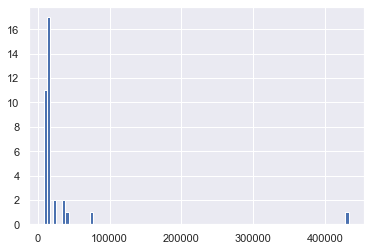

In [311]:
print(outliner_Landsize)
print(min(outliner_Landsize))
plt.hist(outliner_Landsize,100)
plt.show()

#### BuildingArea

In [312]:
outliner_BuildingArea = Zscore_outlier(df_af3['BuildingArea'])

407.0


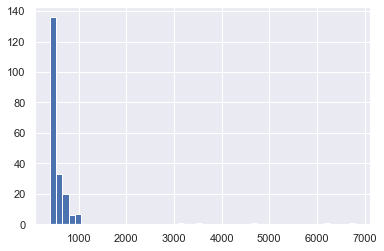

In [313]:
#print(outliner_distance)
print(min(outliner_BuildingArea))
plt.hist(outliner_BuildingArea,50)
plt.show()

#### YearBuilt

In [314]:
outliner_YearBuilt = Zscore_outlier(df_af3['YearBuilt'])

[1850.0, 1860.0, 1880.0, 1880.0, 1875.0, 1885.0, 1880.0, 1880.0, 1872.0, 1880.0, 1880.0, 1880.0, 1880.0, 1880.0, 1860.0, 1880.0, 1880.0, 1880.0, 1880.0, 1880.0, 1880.0, 1880.0, 1880.0, 1880.0, 1880.0, 1885.0, 1880.0, 1880.0, 1880.0, 1880.0, 1880.0, 1880.0, 1880.0, 1885.0, 1880.0, 1863.0, 1880.0, 1870.0, 1880.0, 1880.0, 1880.0, 1885.0, 1880.0, 1880.0, 1886.0, 1880.0, 1880.0, 1880.0, 1886.0, 1857.0, 1880.0, 1868.0, 1884.0, 1880.0, 1880.0, 1863.0, 1880.0, 1880.0, 1860.0, 1880.0, 1880.0, 1880.0, 1880.0, 1886.0, 1880.0, 1880.0, 1880.0, 1880.0, 1880.0, 1880.0, 1880.0, 1885.0, 1880.0, 1880.0, 1880.0, 1880.0, 1880.0, 1886.0, 1880.0, 1880.0, 1880.0, 1880.0, 1880.0, 1877.0, 1880.0, 1880.0, 1880.0, 1880.0, 1880.0, 1880.0, 1886.0, 1196.0, 1880.0, 1880.0, 1880.0, 1880.0, 1880.0, 1860.0, 1880.0, 1860.0, 1886.0, 1880.0, 1880.0, 1880.0, 1880.0, 1856.0, 1860.0, 1880.0, 1863.0, 1800.0, 1880.0, 1880.0, 1860.0, 1857.0, 1880.0, 1880.0, 1880.0, 1870.0, 1880.0, 1880.0, 1877.0, 1880.0, 1880.0, 1880.0, 1880.0,

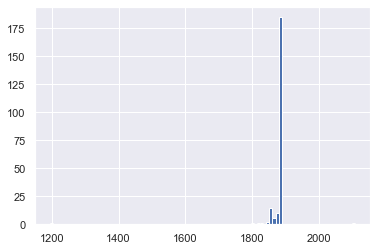

In [315]:
print(outliner_YearBuilt)
print(max(outliner_YearBuilt))
plt.hist(outliner_YearBuilt,100)
plt.show()

##### 2106 is a above outliner, find ouliner below:

In [316]:
outliner_YearBuilt = list(filter(lambda x : x != 2106, outliner_YearBuilt))
print(max(outliner_YearBuilt))

1886.0


In [317]:
print(outliner_YearBuilt)

[1850.0, 1860.0, 1880.0, 1880.0, 1875.0, 1885.0, 1880.0, 1880.0, 1872.0, 1880.0, 1880.0, 1880.0, 1880.0, 1880.0, 1860.0, 1880.0, 1880.0, 1880.0, 1880.0, 1880.0, 1880.0, 1880.0, 1880.0, 1880.0, 1880.0, 1885.0, 1880.0, 1880.0, 1880.0, 1880.0, 1880.0, 1880.0, 1880.0, 1885.0, 1880.0, 1863.0, 1880.0, 1870.0, 1880.0, 1880.0, 1880.0, 1885.0, 1880.0, 1880.0, 1886.0, 1880.0, 1880.0, 1880.0, 1886.0, 1857.0, 1880.0, 1868.0, 1884.0, 1880.0, 1880.0, 1863.0, 1880.0, 1880.0, 1860.0, 1880.0, 1880.0, 1880.0, 1880.0, 1886.0, 1880.0, 1880.0, 1880.0, 1880.0, 1880.0, 1880.0, 1880.0, 1885.0, 1880.0, 1880.0, 1880.0, 1880.0, 1880.0, 1886.0, 1880.0, 1880.0, 1880.0, 1880.0, 1880.0, 1877.0, 1880.0, 1880.0, 1880.0, 1880.0, 1880.0, 1880.0, 1886.0, 1196.0, 1880.0, 1880.0, 1880.0, 1880.0, 1880.0, 1860.0, 1880.0, 1860.0, 1886.0, 1880.0, 1880.0, 1880.0, 1880.0, 1856.0, 1860.0, 1880.0, 1863.0, 1800.0, 1880.0, 1880.0, 1860.0, 1857.0, 1880.0, 1880.0, 1880.0, 1870.0, 1880.0, 1880.0, 1877.0, 1880.0, 1880.0, 1880.0, 1880.0,

#### Date 

In [318]:
year = []
for date in df_af3['Date']:
    year.append(date.year)

In [319]:
print(min(year))
print(max(year))

2016
2018


In [320]:
outliner_date = Zscore_outlier(year)

In [321]:
print(outliner_date)


[]


##### Date don't have any ouliner

#### Remove Outliners: 

In [322]:
temp_min = [min(outliner_car),min(outliner_rooms),min(outliner_price),
min(outliner_distance),min(outliner_Bathroom),min(outliner_Landsize),min(outliner_BuildingArea)]
print(temp_min)
temp_feature = ['Car','Rooms','Price','Distance','Bathroom','Landsize','BuildingArea']

[5.0, 6, 2855000.0, 29.8, 4.0, 8888.0, 407.0]


In [323]:
for i in range(len(temp_min)):
    df_af3 = df_af3[df_af3[temp_feature[i]] < temp_min[i]]

In [324]:
df_af3 = df_af3[df_af3['YearBuilt'] != 2106 ]
df_af3 = df_af3[df_af3['YearBuilt'] > 1886 ]

In [325]:
df_af3.describe()


,Rooms,Price,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt
count,26315.000000,2.631500e+04,26315.000000,26315.000000,26315.000000,26315.000000,26315.000000,26315.000000
mean,3.013718,1.021027e+06,10.300426,1.694281,1.769295,544.631769,144.535790,1964.024511
std,0.873248,4.431508e+05,5.056171,0.574452,0.738171,401.765930,39.145726,23.758369
min,1.000000,1.120000e+05,0.700000,0.000000,0.000000,1.000000,0.010000,1887.000000
25%,2.000000,7.400000e+05,6.400000,1.000000,1.000000,416.000000,141.000000,1965.000000
50%,3.000000,9.320000e+05,10.100000,2.000000,2.000000,544.000000,141.000000,1965.000000
75%,4.000000,1.200000e+06,13.500000,2.000000,2.000000,592.000000,141.000000,1965.000000
max,5.000000,2.852000e+06,27.200000,3.000000,4.000000,8680.000000,406.000000,2019.000000


In [326]:
df_af3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26315 entries, 0 to 30623
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Suburb        26315 non-null  object 
 1   Address       26315 non-null  object 
 2   Rooms         26315 non-null  int64  
 3   Type          26315 non-null  object 
 4   Price         26315 non-null  float64
 5   Method        26315 non-null  object 
 6   Date          26315 non-null  object 
 7   Distance      26315 non-null  float64
 8   Bathroom      26315 non-null  float64
 9   Car           26315 non-null  float64
 10  Landsize      26315 non-null  float64
 11  BuildingArea  26315 non-null  float64
 12  YearBuilt     26315 non-null  float64
dtypes: float64(7), int64(1), object(5)
memory usage: 2.8+ MB


In [327]:
df_af3.head(5)

,Suburb,Address,Rooms,Type,Price,Method,Date,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt
0,Abbotsford,68 Studley St,2,h,932000.0,SS,2016-03-09,2.5,1.0,1.0,126.0,141.0,1965.0
1,Reservoir,36a Ashton St,3,u,666000.0,S,2016-03-09,11.2,2.0,2.0,544.0,141.0,1965.0
2,Reservoir,3/39 Chaleyer St,2,u,932000.0,S,2016-03-09,11.2,1.0,1.0,147.0,141.0,1998.0
3,Reservoir,1/21 Dumbarton St,3,u,475000.0,S,2016-03-09,11.2,1.0,1.0,191.0,107.0,1990.0
4,Reservoir,39 Gertz Av,5,h,932000.0,W,2016-03-09,11.2,2.0,2.0,544.0,141.0,1965.0


## Next is changing categories to numbers.
#### Change ADDRESS to 0,1 ( we assume that price will be affect by alleys or main streets)


In [328]:
test = df_af3['Address'].str.contains('/')
temp = {False:'1', True: '0'}
address = test.replace(temp)

In [329]:
print(address)

0        1
1        1
2        0
3        0
4        1
        ..
30618    1
30619    1
30620    1
30621    0
30623    1
Name: Address, Length: 26315, dtype: object


In [330]:
df_af4 = df_af3.copy()
df_af4.head(5)

,Suburb,Address,Rooms,Type,Price,Method,Date,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt
0,Abbotsford,68 Studley St,2,h,932000.0,SS,2016-03-09,2.5,1.0,1.0,126.0,141.0,1965.0
1,Reservoir,36a Ashton St,3,u,666000.0,S,2016-03-09,11.2,2.0,2.0,544.0,141.0,1965.0
2,Reservoir,3/39 Chaleyer St,2,u,932000.0,S,2016-03-09,11.2,1.0,1.0,147.0,141.0,1998.0
3,Reservoir,1/21 Dumbarton St,3,u,475000.0,S,2016-03-09,11.2,1.0,1.0,191.0,107.0,1990.0
4,Reservoir,39 Gertz Av,5,h,932000.0,W,2016-03-09,11.2,2.0,2.0,544.0,141.0,1965.0


In [331]:
df_af4['Address'] = address
df_af4.head(5)

,Suburb,Address,Rooms,Type,Price,Method,Date,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt
0,Abbotsford,1,2,h,932000.0,SS,2016-03-09,2.5,1.0,1.0,126.0,141.0,1965.0
1,Reservoir,1,3,u,666000.0,S,2016-03-09,11.2,2.0,2.0,544.0,141.0,1965.0
2,Reservoir,0,2,u,932000.0,S,2016-03-09,11.2,1.0,1.0,147.0,141.0,1998.0
3,Reservoir,0,3,u,475000.0,S,2016-03-09,11.2,1.0,1.0,191.0,107.0,1990.0
4,Reservoir,1,5,h,932000.0,W,2016-03-09,11.2,2.0,2.0,544.0,141.0,1965.0


#### Change date to year (because we aim to similar this feature, other option is divide date into quarters and index them)

In [332]:
temp =[]

for i in df_af4['Date']:
    temp.append(i.year)
df_af4['Date'] = temp


In [333]:
df_af4.head(4)

,Suburb,Address,Rooms,Type,Price,Method,Date,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt
0,Abbotsford,1,2,h,932000.0,SS,2016,2.5,1.0,1.0,126.0,141.0,1965.0
1,Reservoir,1,3,u,666000.0,S,2016,11.2,2.0,2.0,544.0,141.0,1965.0
2,Reservoir,0,2,u,932000.0,S,2016,11.2,1.0,1.0,147.0,141.0,1998.0
3,Reservoir,0,3,u,475000.0,S,2016,11.2,1.0,1.0,191.0,107.0,1990.0


## Change Suburbs to numbers

In [334]:
list_Suburb = pd.DataFrame()
list_Suburb['Suburb'] = df_af4['Suburb'].unique()

In [335]:
list_Suburb.head(5)

,Suburb
0,Abbotsford
1,Reservoir
2,Bentleigh East
3,Richmond
4,Glen Iris


In [336]:
df_af4 = df_af4.replace(np.squeeze(list_Suburb.values), list(list_Suburb.index))

In [337]:
df_af4.head(5)

,Suburb,Address,Rooms,Type,Price,Method,Date,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt
0,0,1,2,h,932000.0,SS,2016,2.5,1.0,1.0,126.0,141.0,1965.0
1,1,1,3,u,666000.0,S,2016,11.2,2.0,2.0,544.0,141.0,1965.0
2,1,0,2,u,932000.0,S,2016,11.2,1.0,1.0,147.0,141.0,1998.0
3,1,0,3,u,475000.0,S,2016,11.2,1.0,1.0,191.0,107.0,1990.0
4,1,1,5,h,932000.0,W,2016,11.2,2.0,2.0,544.0,141.0,1965.0


## Similar with Type và Method

In [338]:
list_Type = pd.DataFrame()
list_Type['Type'] = df_af4['Type'].unique()
list_Method = pd.DataFrame()
list_Method['Method'] = df_af4['Method'].unique()

In [339]:
list_Type.head(5)

,Type
0,h
1,u
2,t


In [340]:
list_Method.head(5)

,Method
0,SS
1,S
2,W
3,PI
4,SN


In [341]:
df_af4 = df_af4.replace(np.squeeze(list_Type.values), list(list_Type.index))
df_af4 = df_af4.replace(np.squeeze(list_Method.values), list(list_Method.index))

# Summary:

In [342]:
df_af4.head(10)

,Suburb,Address,Rooms,Type,Price,Method,Date,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt
0,0,1,2,0,932000.0,0,2016,2.5,1.0,1.0,126.0,141.0,1965.0
1,1,1,3,1,666000.0,1,2016,11.2,2.0,2.0,544.0,141.0,1965.0
2,1,0,2,1,932000.0,1,2016,11.2,1.0,1.0,147.0,141.0,1998.0
3,1,0,3,1,475000.0,1,2016,11.2,1.0,1.0,191.0,107.0,1990.0
4,1,1,5,0,932000.0,2,2016,11.2,2.0,2.0,544.0,141.0,1965.0
5,1,1,3,0,738000.0,1,2016,11.2,2.0,2.0,544.0,141.0,1965.0
6,1,0,2,2,355000.0,3,2016,11.2,2.0,2.0,544.0,141.0,1965.0
7,1,1,3,0,590000.0,1,2016,11.2,2.0,2.0,544.0,141.0,1965.0
8,1,1,2,0,932000.0,4,2016,11.2,1.0,1.0,695.0,122.0,1950.0
9,1,0,2,1,415000.0,3,2016,11.2,1.0,1.0,189.0,84.0,2012.0


In [343]:
df_af4.describe()

,Suburb,Rooms,Type,Price,Method,Date,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt
count,26315.000000,26315.000000,26315.000000,2.631500e+04,26315.000000,26315.000000,26315.000000,26315.000000,26315.000000,26315.000000,26315.000000,26315.000000
mean,53.743454,3.013718,0.411324,1.021027e+06,2.644727,2016.837659,10.300426,1.694281,1.769295,544.631769,144.535790,1964.024511
std,43.349606,0.873248,0.690323,4.431508e+05,2.271909,0.639592,5.056171,0.574452,0.738171,401.765930,39.145726,23.758369
min,0.000000,1.000000,0.000000,1.120000e+05,0.000000,2016.000000,0.700000,0.000000,0.000000,1.000000,0.010000,1887.000000
25%,16.000000,2.000000,0.000000,7.400000e+05,1.000000,2016.000000,6.400000,1.000000,1.000000,416.000000,141.000000,1965.000000
50%,43.000000,3.000000,0.000000,9.320000e+05,1.000000,2017.000000,10.100000,2.000000,2.000000,544.000000,141.000000,1965.000000
75%,84.000000,4.000000,1.000000,1.200000e+06,4.000000,2017.000000,13.500000,2.000000,2.000000,592.000000,141.000000,1965.000000
max,159.000000,5.000000,2.000000,2.852000e+06,8.000000,2018.000000,27.200000,3.000000,4.000000,8680.000000,406.000000,2019.000000


In [344]:
df_af4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26315 entries, 0 to 30623
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Suburb        26315 non-null  int64  
 1   Address       26315 non-null  object 
 2   Rooms         26315 non-null  int64  
 3   Type          26315 non-null  int64  
 4   Price         26315 non-null  float64
 5   Method        26315 non-null  int64  
 6   Date          26315 non-null  int64  
 7   Distance      26315 non-null  float64
 8   Bathroom      26315 non-null  float64
 9   Car           26315 non-null  float64
 10  Landsize      26315 non-null  float64
 11  BuildingArea  26315 non-null  float64
 12  YearBuilt     26315 non-null  float64
dtypes: float64(7), int64(5), object(1)
memory usage: 2.8+ MB



# Test Anova 


### We have filled potential features and ready to use them for building ML model, but first, we should do an Anova test to make sure if these actually affect to Price

#### Check distribution

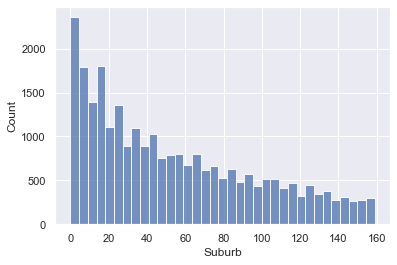

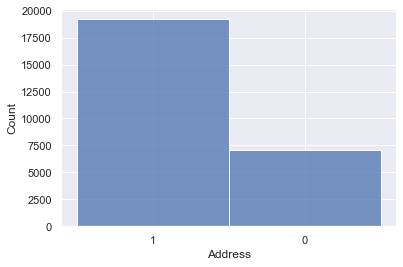

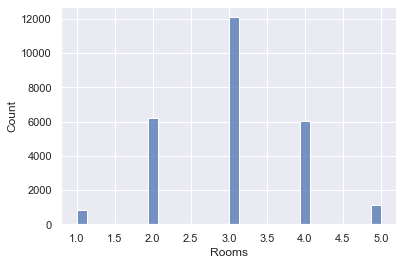

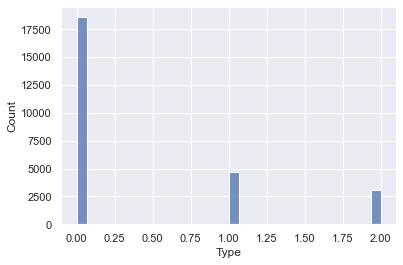

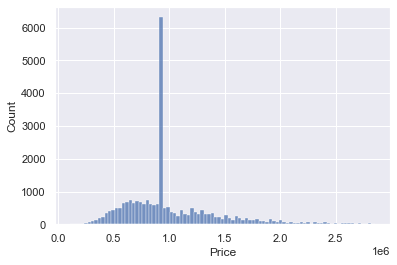

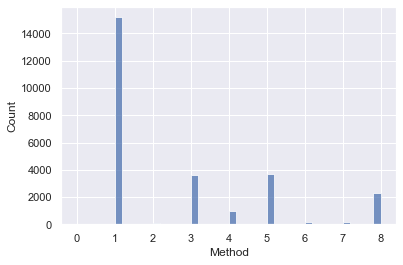

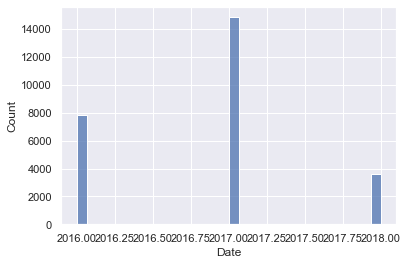

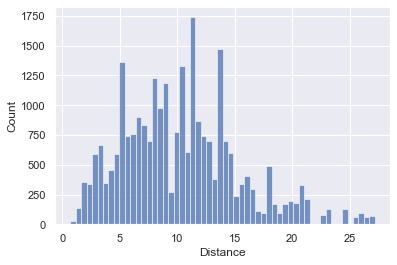

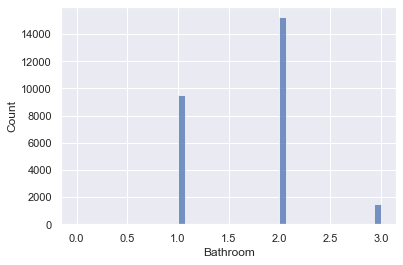

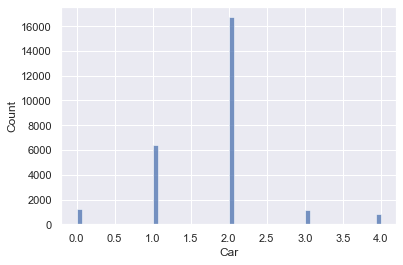

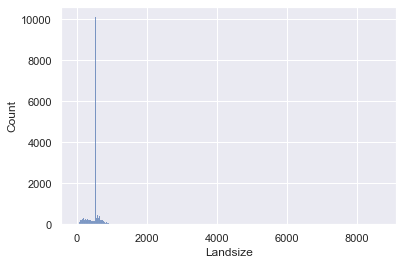

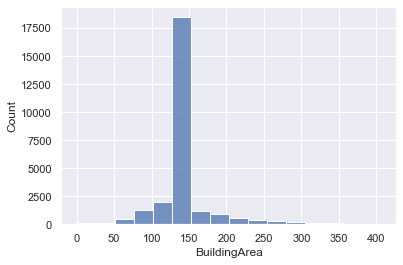

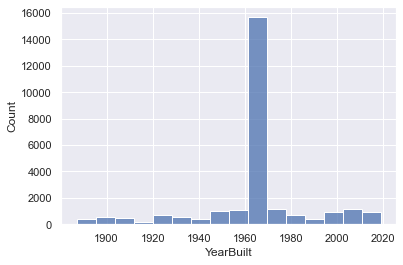

In [345]:
for i in df_af4:
    ax = sns.histplot(df_af4[i])
    plt.show()

In [346]:
for i in df_af4:
    anova_test = f_oneway(list(df_af4.get('Price')), list(df_af4.get(i)))
    print(i,'/ Price' , anova_test)

Suburb / Price F_onewayResult(statistic=139678.41335007007, pvalue=0.0)
Address / Price F_onewayResult(statistic=139692.9205450866, pvalue=0.0)
Rooms / Price F_onewayResult(statistic=139692.29560516012, pvalue=0.0)
Type / Price F_onewayResult(statistic=139693.00770378602, pvalue=0.0)
Price / Price F_onewayResult(statistic=7.390303882875509e-29, pvalue=1.0)
Method / Price F_onewayResult(statistic=139692.39656970333, pvalue=0.0)
Date / Price F_onewayResult(statistic=139141.79296588397, pvalue=0.0)
Distance / Price F_onewayResult(statistic=139690.30172055078, pvalue=0.0)
Bathroom / Price F_onewayResult(statistic=139692.65664565063, pvalue=0.0)
Car / Price F_onewayResult(statistic=139692.63611919506, pvalue=0.0)
Landsize / Price F_onewayResult(statistic=139544.01634844695, pvalue=0.0)
BuildingArea / Price F_onewayResult(statistic=139653.57227466197, pvalue=0.0)
YearBuilt / Price F_onewayResult(statistic=139156.21578833085, pvalue=0.0)


#### All features have a pvalue = 0, so we can say that these actually affect price.

# Normalization


In [347]:
df_final = df_af4.copy()

#### Check distribution of Price base on BuildingArea

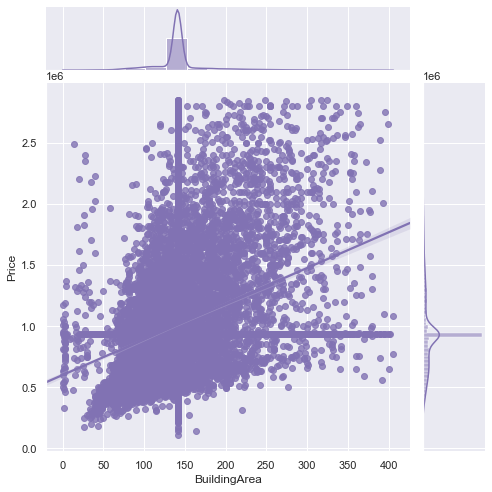

In [348]:
sns.set_theme(style="darkgrid")
g = sns.jointplot(x=df_final['BuildingArea'], y=df_final['Price'],data=df_final,
                  kind="reg", truncate=False,
                  color="m", height=7)

In [349]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26315 entries, 0 to 30623
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Suburb        26315 non-null  int64  
 1   Address       26315 non-null  object 
 2   Rooms         26315 non-null  int64  
 3   Type          26315 non-null  int64  
 4   Price         26315 non-null  float64
 5   Method        26315 non-null  int64  
 6   Date          26315 non-null  int64  
 7   Distance      26315 non-null  float64
 8   Bathroom      26315 non-null  float64
 9   Car           26315 non-null  float64
 10  Landsize      26315 non-null  float64
 11  BuildingArea  26315 non-null  float64
 12  YearBuilt     26315 non-null  float64
dtypes: float64(7), int64(5), object(1)
memory usage: 2.8+ MB


In [350]:
df_final['Address'] = pd.to_numeric(df_final['Address'])

In [351]:
df_final.describe()

,Suburb,Address,Rooms,Type,Price,Method,Date,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt
count,26315.000000,26315.000000,26315.000000,26315.000000,2.631500e+04,26315.000000,26315.000000,26315.000000,26315.000000,26315.000000,26315.000000,26315.000000,26315.000000
mean,53.743454,0.729850,3.013718,0.411324,1.021027e+06,2.644727,2016.837659,10.300426,1.694281,1.769295,544.631769,144.535790,1964.024511
std,43.349606,0.444046,0.873248,0.690323,4.431508e+05,2.271909,0.639592,5.056171,0.574452,0.738171,401.765930,39.145726,23.758369
min,0.000000,0.000000,1.000000,0.000000,1.120000e+05,0.000000,2016.000000,0.700000,0.000000,0.000000,1.000000,0.010000,1887.000000
25%,16.000000,0.000000,2.000000,0.000000,7.400000e+05,1.000000,2016.000000,6.400000,1.000000,1.000000,416.000000,141.000000,1965.000000
50%,43.000000,1.000000,3.000000,0.000000,9.320000e+05,1.000000,2017.000000,10.100000,2.000000,2.000000,544.000000,141.000000,1965.000000
75%,84.000000,1.000000,4.000000,1.000000,1.200000e+06,4.000000,2017.000000,13.500000,2.000000,2.000000,592.000000,141.000000,1965.000000
max,159.000000,1.000000,5.000000,2.000000,2.852000e+06,8.000000,2018.000000,27.200000,3.000000,4.000000,8680.000000,406.000000,2019.000000


#### define a normalize function ( redistribute all value from -1 to 1 )

In [352]:
def mean_normalization(x):
    e = (x - df_final[feature].mean()) / (df_final[feature].max() - df_final[feature].min())
    return e

In [353]:
df_final.head(5)

,Suburb,Address,Rooms,Type,Price,Method,Date,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt
0,0,1,2,0,932000.0,0,2016,2.5,1.0,1.0,126.0,141.0,1965.0
1,1,1,3,1,666000.0,1,2016,11.2,2.0,2.0,544.0,141.0,1965.0
2,1,0,2,1,932000.0,1,2016,11.2,1.0,1.0,147.0,141.0,1998.0
3,1,0,3,1,475000.0,1,2016,11.2,1.0,1.0,191.0,107.0,1990.0
4,1,1,5,0,932000.0,2,2016,11.2,2.0,2.0,544.0,141.0,1965.0


In [354]:
df_final2 = df_final.copy()

In [355]:
for feature in df_final:
#     if feature != 'Price':
    df_final2[feature] = df_final[feature].apply(lambda x: mean_normalization(x))

In [356]:
df_final = df_final2.copy() 
df_final.head(5)

,Suburb,Address,Rooms,Type,Price,Method,Date,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt
0,-0.338009,0.27015,-0.25343,-0.205662,-0.032492,-0.330591,-0.41883,-0.294356,-0.231427,-0.192324,-0.048235,-0.008709,0.007390
1,-0.331720,0.27015,-0.00343,0.294338,-0.129572,-0.205591,-0.41883,0.033946,0.101906,0.057676,-0.000073,-0.008709,0.007390
2,-0.331720,-0.72985,-0.25343,0.294338,-0.032492,-0.205591,-0.41883,0.033946,-0.231427,-0.192324,-0.045815,-0.008709,0.257390
3,-0.331720,-0.72985,-0.00343,0.294338,-0.199280,-0.205591,-0.41883,0.033946,-0.231427,-0.192324,-0.040746,-0.092455,0.196784
4,-0.331720,0.27015,0.49657,-0.205662,-0.032492,-0.080591,-0.41883,0.033946,0.101906,0.057676,-0.000073,-0.008709,0.007390


In [357]:
df_final.describe()

,Suburb,Address,Rooms,Type,Price,Method,Date,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt
count,2.631500e+04,2.631500e+04,2.631500e+04,2.631500e+04,2.631500e+04,2.631500e+04,2.631500e+04,2.631500e+04,2.631500e+04,2.631500e+04,2.631500e+04,2.631500e+04,2.631500e+04
mean,3.024161e-17,5.238278e-17,-4.860258e-17,-2.214118e-17,1.080057e-18,-4.478863e-17,5.500516e-14,-5.184275e-17,4.050215e-18,-1.593085e-17,3.375179e-18,-5.548795e-17,-3.799102e-16
std,2.726390e-01,4.440456e-01,2.183119e-01,3.451615e-01,1.617339e-01,2.839886e-01,3.197960e-01,1.907989e-01,1.914840e-01,1.845427e-01,4.629173e-02,9.642042e-02,1.799876e-01
min,-3.380091e-01,-7.298499e-01,-5.034296e-01,-2.056622e-01,-3.317618e-01,-3.305909e-01,-4.188296e-01,-3.622802e-01,-5.647603e-01,-4.423238e-01,-6.263760e-02,-3.559836e-01,-5.835190e-01
25%,-2.373802e-01,-7.298499e-01,-2.534296e-01,-2.056622e-01,-1.025647e-01,-2.055909e-01,-4.188296e-01,-1.471859e-01,-2.314269e-01,-1.923238e-01,-1.482104e-02,-8.709057e-03,7.390070e-03
50%,-6.756889e-02,2.701501e-01,-3.429603e-03,-2.056622e-01,-3.249169e-02,-2.055909e-01,8.117044e-02,-7.563231e-03,1.019064e-01,5.767623e-02,-7.279283e-05,-8.709057e-03,7.390070e-03
75%,1.902927e-01,2.701501e-01,2.465704e-01,2.943378e-01,6.531853e-02,1.694091e-01,8.117044e-02,1.207387e-01,1.019064e-01,5.767623e-02,5.457798e-03,-8.709057e-03,7.390070e-03
max,6.619909e-01,2.701501e-01,4.965704e-01,7.943378e-01,6.682382e-01,6.694091e-01,5.811704e-01,6.377198e-01,4.352397e-01,5.576762e-01,9.373624e-01,6.440164e-01,4.164810e-01


### We can see that for now, all features is all numeric, range( -1, 1) and ready to fit to ML model

# MODELlNG

## Divide into train set, test set

#### divide 80% train, 20% test

In [358]:
train_dataset = df_final.sample(frac=0.8, random_state=None)
test_dataset = df_final.drop(train_dataset.index)

In [359]:
train_dataset.head(5)

,Suburb,Address,Rooms,Type,Price,Method,Date,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt
28488,0.485890,0.27015,0.24657,-0.205662,0.269698,-0.205591,0.08117,0.116965,0.101906,0.057676,-0.000073,-0.008709,0.007390
27752,0.435576,0.27015,-0.00343,-0.205662,-0.025922,-0.205591,0.08117,0.241493,0.101906,0.057676,0.012256,-0.008709,0.007390
1609,-0.319141,-0.72985,-0.25343,0.794338,-0.025922,-0.205591,-0.41883,-0.290582,0.101906,0.057676,-0.000073,-0.008709,0.007390
14994,-0.080148,0.27015,-0.00343,-0.205662,0.096340,-0.205591,0.08117,-0.150959,-0.231427,0.057676,-0.041322,-0.158959,-0.333519
11442,-0.168198,0.27015,0.24657,-0.205662,-0.032492,-0.205591,0.58117,-0.003790,0.101906,-0.442324,-0.029108,-0.011172,-0.409277


In [360]:
price_train = np.array(train_dataset['Price'])
feature_train = list()
price_test = np.array(test_dataset['Price'])
feature_test = list()

#### create arrays feature and price

In [361]:
for i in df_final:
    if i != 'Price':
        feature_train.append(list(train_dataset[i]))
        feature_test.append(list(test_dataset[i]))

In [362]:
feature_train = np.array(feature_train).transpose()
feature_test = np.array(feature_test).transpose()


In [363]:
print('feature train shape:', feature_train.shape)
print('price train shape:', price_train.shape)
print('feature test shape:', feature_test.shape)
print('price test shape:', price_test.shape)

feature train shape: (21052, 12)
price train shape: (21052,)
feature test shape: (5263, 12)
price test shape: (5263,)


In [364]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

# Basic Linear Regression

In [365]:
model_linear = tf.keras.Sequential([
    layers.Dense(1)
])

In [366]:
model_linear.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.00001),
    loss= tf.keras.losses.MeanSquaredError())

In [367]:
history_linear = model_linear.fit(
    feature_train, price_train,
    epochs = 50,
    verbose = 0,
    validation_split = 0.2)

In [368]:
hist_linear = pd.DataFrame(history_linear.history)
hist_linear['epoch'] = history_linear.epoch
hist_linear.tail()

,loss,val_loss,epoch
45,0.041958,0.041035,45
46,0.041364,0.040458,46
47,0.040783,0.039892,47
48,0.040216,0.039340,48
49,0.039661,0.038798,49


In [369]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 0.2])
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)

#### Because feature's range is from -1 to 1 so we have 2 is a max difference between two values

Train Percent: 98.01692962646484
Val Percent: 98.06009288877249


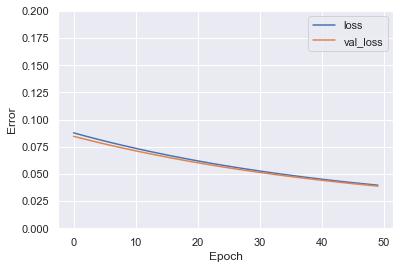

In [370]:
plot_loss(history_linear)
print('Train Percent:', ((2 - history_linear.history['loss'][-1] ) / 2) * 100)
print('Val Percent:', ((2 - history_linear.history['val_loss'][-1] ) / 2) * 100)


#### Comment:
#### The error decrease over time, so that we can pretend our model worked.
#### Its not over yet, we can see that the line can be down more if we increase the number of epoch.
#### Performent is quite good, train and val percent is not too difference.

### Evaluate model with Test sample

In [371]:
test_predictions_linear = model_linear.predict(feature_test)
test_percent_linear = ((2 - (np.abs(test_predictions_linear - price_test_reshape))) / 2) * 100

In [372]:
#test_result = model.evaluate(feature_test_transpose, price_test_reshape)
print('Test Percent linear:', test_percent_linear)
print('min of test percent linear:', min(test_percent_linear))
print('max of test percent linear:', max(test_percent_linear))

Test Percent linear: [[86.04085499]
 [90.04923559]
 [93.7478725 ]
 ...
 [95.74320188]
 [98.39440092]
 [95.04048701]]
min of test percent linear: [52.73547076]
max of test percent linear: [99.99595808]


c:\users\admin\desktop\python\neuralnetwork\venv1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

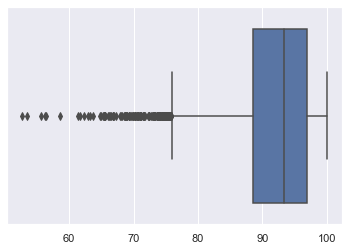

In [373]:
sns.boxplot(test_percent_linear)

# BASIC NEURAL NETWORK

In [374]:
model_nn = tf.keras.Sequential([
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])

In [375]:
model_nn.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.00001),
    loss= tf.keras.losses.MeanSquaredError())

In [376]:
history_nn = model_nn.fit(
    feature_train, price_train,
    epochs = 50,
    verbose = 0,
    validation_split = 0.2)

In [377]:
hist_nn = pd.DataFrame(history_nn.history)
hist_nn['epoch'] = history_nn.epoch
hist_nn.tail()

,loss,val_loss,epoch
45,0.019038,0.018518,45
46,0.018986,0.018473,46
47,0.018936,0.018428,47
48,0.018890,0.018386,48
49,0.018844,0.018348,49


Train Percent: 99.05779100954533
Val Percent: 99.0826123394072


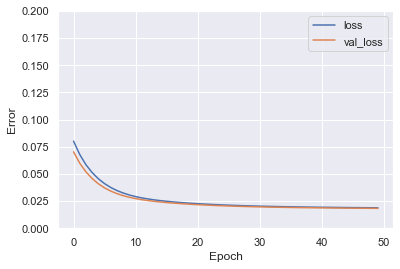

In [378]:
plot_loss(history_nn)
print('Train Percent:', ((2 - history_nn.history['loss'][-1] ) / 2) * 100)
print('Val Percent:', ((2 - history_nn.history['val_loss'][-1] ) / 2) * 100)


#### Comment:
#### The error decrease over time, so that we can pretend our model worked.
#### Its almost linear after 30 epoch, so we can assume that the model is completed predict now.


In [379]:
test_predictions_nn = model_nn.predict(feature_test)
test_percent_nn = ((2 - (np.abs(test_predictions_nn - price_test_reshape))) / 2) * 100

In [380]:
#test_result = model.evaluate(feature_test_transpose, price_test_reshape)
print('Test Percent NN:', test_percent)
print('min of test percent NN:', min(test_percent))
print('max of test percent NN:', max(test_percent))

Test Percent NN: [[95.31760009]
 [97.11733234]
 [92.82446206]
 ...
 [98.80967641]
 [97.38515744]
 [96.97983882]]
min of test percent NN: [60.53257317]
max of test percent NN: [99.99433887]


c:\users\admin\desktop\python\neuralnetwork\venv1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

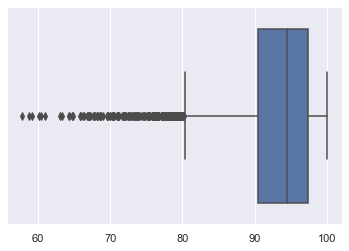

In [381]:
sns.boxplot(test_percent_nn)

#### Outliner start at 80% so almost every times, model will have more than 80% accurate.
#### We can see that many times, the accurate will be over 90%, that mean if a house cost 1,000,000 USD, model will have a high chance predict price in range 900,000 to 1,100,000

# TEST WITH PCA 

In [382]:
from sklearn.decomposition import TruncatedSVD

In [383]:
modelsvd = TruncatedSVD(n_components=1)
feature_train_svd = modelsvd.fit(feature_train.T).components_.transpose()
feature_test_svd = modelsvd.fit(feature_test.T).components_.transpose()

In [384]:
print('feature train pca shape:', feature_train_svd.shape)
print('price train shape:', price_train.shape)
print('feature test pca shape:', feature_test_svd.shape)
print('price test shape:', price_test.shape)

feature train pca shape: (21052, 1)
price train shape: (21052,)
feature test pca shape: (5263, 1)
price test shape: (5263,)


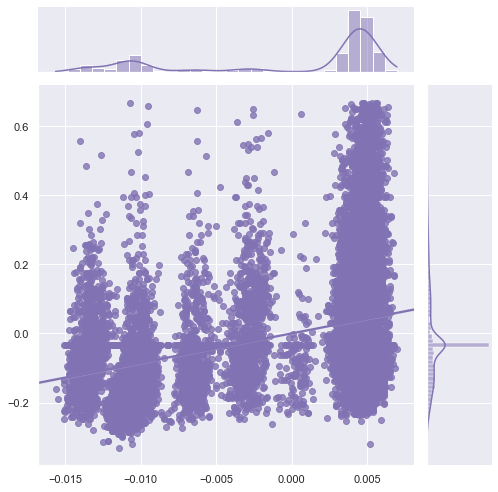

In [385]:
sns.set_theme(style="darkgrid")
g = sns.jointplot(x=feature_train_svd.flatten(), y=price_train.flatten(),
                  kind="reg", truncate=False,
                  color="m", height=7)

In [386]:
model_pca = tf.keras.Sequential([
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])

In [387]:
model_pca.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.00001),
    loss= tf.keras.losses.MeanSquaredError())

In [388]:
history_pca = model_pca.fit(
    feature_train_svd, price_train,
    epochs = 50,
    verbose = 0,
    validation_split = 0.2)


In [389]:
hist_pca = pd.DataFrame(history_pca.history)
hist_pca['epoch'] = history_pca.epoch
hist_pca.tail()

,loss,val_loss,epoch
45,0.024322,0.022805,45
46,0.024292,0.022777,46
47,0.024262,0.022749,47
48,0.024232,0.022722,48
49,0.024204,0.022696,49


Train Percent: 98.78981588408351
Val Percent: 98.86520216241479


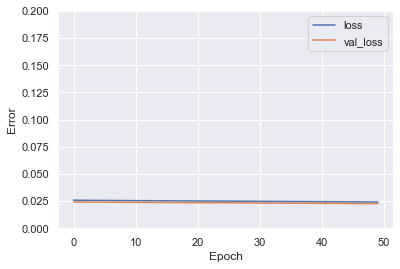

In [390]:
plot_loss(history_pca)
print('Train Percent:', ((2 - history_pca.history['loss'][-1] ) / 2) * 100)
print('Val Percent:', ((2 - history_pca.history['val_loss'][-1] ) / 2) * 100)


In [391]:
test_predictions_pca = model_pca.predict(feature_test_svd)
test_percent_pca = ((2 - (np.abs(test_predictions_pca - price_test_reshape))) / 2) * 100

In [392]:
#test_result = model.evaluate(feature_test_transpose, price_test_reshape)
print('Test Percent PCA:', test_percent_pca)
print('min of test percent PCA:', min(test_percent_pca))
print('max of test percent PCA:', max(test_percent_pca))

Test Percent PCA: [[97.19112839]
 [89.76766636]
 [92.24025794]
 ...
 [96.46474959]
 [96.7978196 ]
 [97.46945913]]
min of test percent PCA: [63.2395494]
max of test percent PCA: [99.9978717]


In [393]:
def plot(x, y):
  plt.scatter(feature_train_svd, price_train, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('pca')
  plt.ylabel('price')
  plt.legend()

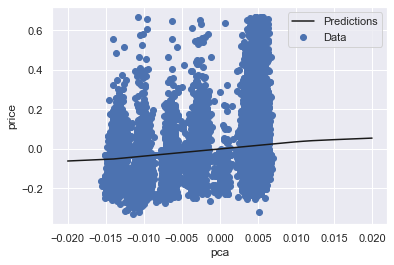

In [394]:
x = tf.linspace(-0.02, 0.02, 200)
plot(x , model_pca.predict(x))